In [ ]:
%load_ext autoreload
%autoreload 2
%pdb 0

In [1]:
import pandas as pd
import numpy as np
import csrar
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm

In [ ]:
# Redirect output for long sessions
import sys
sys.stderr=open("err.txt","w")
sys.stdout=open("logs.txt", "w")

In [ ]:
data = pd.read_csv('../data/page-blocks0.csv')

In [ ]:
data = pd.read_csv('../data/isolet.csv', header=None)

In [ ]:
np.unique(data[617], return_counts=True)

In [ ]:
data

In [ ]:
# For rootkit_imap...
for cat_col in ['Atr-1', 'Atr-2', 'Atr-3']:
    data[cat_col] = pd.Categorical(data[cat_col])
    data[cat_col] = data[cat_col].cat.codes

In [ ]:
# For page-block0.csv, convert 'positive'/'negative' to 0 and 1
data['Class'] = pd.Categorical(data['Class'])
data['Class'] = data['Class'].cat.codes

In [ ]:
data.dtypes

In [ ]:
uniques = np.unique(data[617], return_counts=True)
perc = list(map(lambda c: c/len(data), uniques[1]))
perc

In [2]:
import arff
file = open('../data/test6.arff', 'r')
dataset = arff.load(file)
data = pd.DataFrame(dataset['data'])

In [ ]:
np.unique(data[75], return_counts=True)

In [ ]:
data[150] = data[150].astype(np.float32)

In [ ]:
data[np.arange(10)].min().min()

#### About test2.arff:
useful=Vector(0, 1)  
dependent=Vector(5, 6, 7, 8, 9)  
duplicated=Vector((0,12), (4,10), (6,11))  
nominal=List()  
clusters=[(0, 1, 2), (3, 4)]  
distribution=List(24860, 25140)  
seed=0
#### About test3.arff
useful=Vector(0, 1)  
dependent=Vector(5, 6, 7, 8, 9)  
duplicated=Vector((0,12), (4,10), (6,11))  
nominal=List()  
clusters=[(0, 1, 2), (3, 4)]  
distribution=List(249786, 250214)  
#### About test4.arff
useful=Vector(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29)  
dependent=Vector(100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149)  
duplicated=Vector((7,168), (10,157), (24,159), (28,162), (30,166), (50,169), (61,154), (82,158), (99,167), (104,156), (107,151), (113,164), (117,155), (117,165), (124,150), (135,160), (139,152), (145,161), (146,153), (147,163))  
nominal=List()  
clusters=[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), (10, 11, 12, 13, 14), (15, 16, 17)]  
distribution=List(250085, 249915)  
#### About test5.arff
useful=Vector(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  
dependent=Vector(80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109)  
duplicated=Vector((4,118), (8,114), (8,146), (9,137), (9,144), (10,131), (17,123), (22,116), (24,120), (24,142), (25,125), (35,127), (42,119), (43,122), (45,111), (48,134), (50,132), (52,110), (54,138), (57,112), (57,115), (57,149), (62,141), (64,136), (70,117), (70,148), (73,126), (76,133), (77,140), (78,143), (83,113), (84,139), (91,145), (92,121), (93,128), (93,135), (95,124), (103,129), (104,130), (105,147))  
nominal=List()  
clusters=[(0, 1, 2), (3, 4), (5, 6, 7, 8, 9, 10, 11, 12, 13, 14)]  
distribution=List(99718, 100282)  


### Train/Test Split

In [27]:
classes = dict(list(data.groupby(data[75]))).values()
random_dist = np.random.rand(len(classes))
samples = []
for percentage, values in zip(random_dist, classes):
    samples.append(values.sample(frac=percentage))
imb_data = pd.concat(samples).reset_index(drop=True)

In [28]:
uniques = np.unique(imb_data[75], return_counts=True)
perc = list(map(lambda c: c/len(imb_data), uniques[1]))
perc

[0.41372801028195033,
 0.24965860711703752,
 0.044059763836452728,
 0.29255361876455938]

In [29]:
# biggest difference between classes
max(perc) / min(perc)

9.3901549680948033

In [ ]:
np.unique(imb_data[75], return_counts=True)

In [30]:
data = imb_data

In [ ]:
# Artificially imbalance dataset
class0 = data.loc[data[150] == 0]
class1 = data.loc[data[150] == 1]
imb_data = pd.concat([class1.sample(frac=0.1), class0]).reset_index(drop=True)
# For perfectly balanced dataset, this will result in a 97.56:2.44 ratio

In [31]:
target = 75
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.columns.dtype

## RaR

Relevance: 100.00%    
Running optimizer...
Optimizer done.
Redundancy: 100.00%    
1. 2 with a score of 0.9989621733547432
2. 6 with a score of 0.9860573980739726
3. 13 with a score of 0.339120917644398
4. 71 with a score of 0.3271535757897713
5. 46 with a score of 0.28404230008393244
6. 3 with a score of 0.2798323262206518
7. 63 with a score of 0.22973490584736136
8. 58 with a score of 0.2262396247363757
9. 34 with a score of 0.21291637972649752
10. 9 with a score of 0.1778523996134886
11. 61 with a score of 0.16733054503830774
12. 55 with a score of 0.15992838804597598
13. 29 with a score of 0.15514068553176863
14. 62 with a score of 0.15513329494734127
15. 4 with a score of 0.15210405595438878
16. 50 with a score of 0.13343177620005636
17. 32 with a score of 0.12734790882784258
18. 53 with a score of 0.1273464395298875
19. 5 with a score of 0.11986822280777307
20. 72 with a score of 0.11709421080154472
21. 7 with a score of 0.11630923227190805
22. 42 with a score of 0.1143081414364

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      0.87      0.75      0.77      0.79      0.61      1961
        1.0       0.49      0.36      0.87      0.41      0.62      0.37      1297
        2.0       0.13      0.02      0.99      0.03      0.36      0.12       219
        3.0       0.83      0.85      0.92      0.84      0.88      0.77      1503

avg / total       0.66      0.69      0.84      0.66      0.75      0.57      4980

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      0.86      0.75      0.76      0.78      0.60      1961
        1.0       0.47      0.34      0.87      0.40      0.61      0.36      1297
        2.0       0.06      0.00      1.00      0.01      0.24      0.05       219
        3.0       0.82      0.86      0.92      0.84      0.88      0.76      1503

avg / total       0.64      0.69      0.84      0.66      0.74      0.56      4980

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.70      0.89      0.75      0.78      0.80      0.62      1961
        1.0       0.53      0.36      0.89      0.43      0.65      0.42      1297
        2.0       0.13      0.01      1.00      0.02      0.35      0.11       219
        3.0       0.85      0.88      0.93      0.86      0.90      0.79      1503

avg / total       0.67      0.71      0.85      0.68      0.77      0.60      4980

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      0.90      0.73      0.78      0.80      0.62      1961
        1.0       0.54      0.35      0.89      0.42      0.65      0.42      1297
        2.0       0.00      0.00      1.00      0.00      0.00      0.00       219
        3.0       0.85      0.88      0.93      0.87      0.90      0.80      1503

avg / total       0.67      0.71      0.85      0.68      0.75      0.59      4980

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.68      0.90      0.73      0.78      0.79      0.62      1961
        1.0       0.57      0.36      0.91      0.44      0.68      0.45      1297
        2.0       0.23      0.01      1.00      0.03      0.47      0.20       219
        3.0       0.87      0.91      0.94      0.89      0.92      0.83      1503

avg / total       0.69      0.73      0.85      0.69      0.79      0.62      4980

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.70      0.90      0.74      0.79      0.80      0.63      1961
        1.0       0.57      0.38      0.90      0.45      0.67      0.44      1297
        2.0       0.24      0.02      1.00      0.04      0.48      0.21       219
        3.0       0.87      0.90      0.94      0.89      0.91      0.83      1503

avg / total       0.70      0.73      0.85      0.70      0.79      0.62      4980

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      0.91      0.73      0.79      0.80      0.62      1961
        1.0       0.59      0.37      0.91      0.46      0.69      0.46      1297
        2.0       0.05      0.00      1.00      0.01      0.22      0.04       219
        3.0       0.87      0.89      0.94      0.88      0.91      0.82      1503

avg / total       0.69      0.73      0.85      0.70      0.78      0.62      4980

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.69      0.91      0.73      0.78      0.80      0.62      1961
        1.0       0.54      0.35      0.89      0.42      0.65      0.42      1297
        2.0       0.10      0.00      1.00      0.01      0.31      0.09       219
        3.0       0.87      0.90      0.94      0.88      0.91      0.83      1503

avg / total       0.68      0.72      0.85      0.69      0.77      0.61      4980

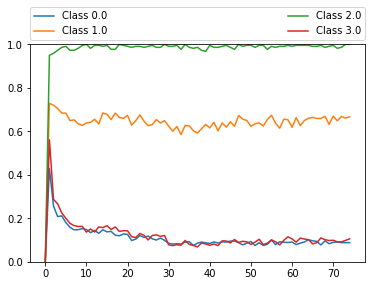

In [35]:
scores = 0
max_k = len(X.columns)
f1_scores = []

for i in range(1):
    rar_data = pd.concat([X_train, y_train], axis=1)
    # RaR uses columns with string label only
    rar_data.rename(columns=lambda c: str(c), inplace=True)
    rar = csrar.rar.RaR(rar_data)
    rar.run(str(target), k=5, runs=100, split_iterations=10, compensate_imbalance=False)
    
    # Evaluate, average relative error rates
    score = pd.DataFrame(columns=np.unique(data[target]), index=np.arange(max_k)).fillna(0)
    for i in range(1, max_k):
        errors = eval_rar_ranking(rar.feature_ranking, target, k=i)
        f1_scores.append(f1)
        for label in errors.columns:
            score.loc[i, label] = errors[label][0]
    scores += score
scores /= 1

import matplotlib.pyplot as plt
# for label in scores.columns:
#     plt.plot(scores[label], label='Class {}'.format(label))
plt.plot(f1_scores)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.savefig('Dev2_test6_imb_f1_nocomp')
plt.show()

In [ ]:
scores_comp = 0
max_k = len(X.columns)
f1_scores = []

for i in range(1):
    rar_data = pd.concat([X_train, y_train], axis=1)
    # RaR uses columns with string label only
    rar_data.rename(columns=lambda c: str(c), inplace=True)
    rar_compensate = csrar.rar.RaR(rar_data)
    rar_compensate.run(str(target), k=5, runs=100, split_iterations=10, compensate_imbalance=True)

    # Evaluate, average relative error rates
    score = pd.DataFrame(columns=np.unique(data[target]), index=np.arange(max_k)).fillna(0)
    for i in range(1, max_k):
        errors, f1 = eval_rar_ranking(rar_compensate.feature_ranking, target, k=i)
        f1_scores.append(f1)
        for label in errors.columns:
            score.loc[i, label] = errors[label][0]
        
    scores_comp += score
scores_comp /= 1

import matplotlib.pyplot as plt
#for label in scores_comp.columns:
#    plt.plot(scores_comp[label], label='Class {}'.format(label))
plt.plot(f1_scores)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.savefig('Dev2_test6_imb_f1')
plt.show()

Generated cost matrix:
        0.0       1.0        2.0       3.0
0  2.388249  4.049197  22.685649  3.445425
Overall cost matrix:
        0.0       1.0        2.0       3.0
0  2.388249  4.049197  22.685649  3.445425
Relevance: 100.00%    
Running optimizer...
Optimizer done.
Redundancy: 26.67%     

#### Benchmarking the increase in weighting

In [ ]:
# Redirect output for long sessions
import sys
sys.stderr=open("err.txt","w")
sys.stdout=open("logs_dev_test6.txt", "w")

In [ ]:
np.unique(data[target], return_counts=True)

Generated cost matrix:
        0.0       1.0       2.0       3.0
0  1.545396  2.012262  4.762945  1.856186
Overall cost matrix:
        0.0       1.0       2.0       3.0
0  1.545396  2.012262  4.762945  1.856186
Relevance: 100.00%    
Running optimizer...
Optimizer done.
Redundancy: 100.00%    
1. 6 with a score of 0.998979781582796
2. 2 with a score of 0.6801253626626512
3. 40 with a score of 0.6800414493224536
4. 34 with a score of 0.680023962312007
5. 70 with a score of 0.328497361678845
6. 71 with a score of 0.32339573791212956
7. 74 with a score of 0.3129061448022621
8. 29 with a score of 0.30937503266877375
9. 53 with a score of 0.30033487644799256
10. 41 with a score of 0.2923465842204281
11. 3 with a score of 0.292343789614641
12. 63 with a score of 0.2923369090500941
13. 0 with a score of 0.29233196257570443
14. 11 with a score of 0.20103171958087473
15. 57 with a score of 0.20101764701720243
16. 7 with a score of 0.19131333500307468
17. 58 with a score of 0.17874679870458107


Relevance: 100.00%    
Running optimizer...
Optimizer done.
Redundancy: 100.00%    
1. 58 with a score of 0.9989898431492771
2. 10 with a score of 0.9488707438135037
3. 14 with a score of 0.9487238084814625
4. 18 with a score of 0.9486808486317607
5. 17 with a score of 0.9486582364539554
6. 38 with a score of 0.9486220544866633
7. 34 with a score of 0.9486175315258778
8. 22 with a score of 0.948583607797833
9. 5 with a score of 0.9485587286899404
10. 36 with a score of 0.9485180143059423
11. 1 with a score of 0.9485112281991114
12. 21 with a score of 0.9484410988010216
13. 39 with a score of 0.9484410988010213
14. 23 with a score of 0.9484275240432771
15. 20 with a score of 0.9484207365031357
16. 69 with a score of 0.9483935852673744
17. 2 with a score of 0.9483890598941549
18. 8 with a score of 0.9483732207115319
19. 71 with a score of 0.9483664323111849
20. 42 with a score of 0.9483324886963447
21. 64 with a score of 0.9482849631184038
22. 9 with a score of 0.9482600666645625
23. 63 

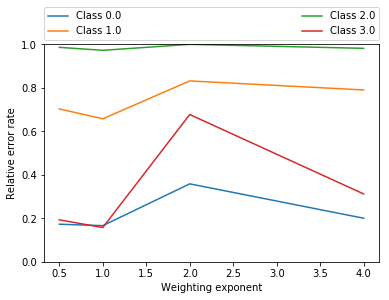

In [33]:
steps = [0.5, 1, 2, 4]
scores_comp = pd.DataFrame(columns=np.unique(data[target]), index=steps).fillna(0)

for i in steps:
    rar_data = pd.concat([X_train, y_train], axis=1)
    # RaR uses columns with string label only
    rar_data.rename(columns=lambda c: str(c), inplace=True)
    rar_compensate = csrar.rar.RaR(rar_data)
    rar_compensate.run(str(target), k=4, runs=100, split_iterations=10, compensate_imbalance=True, weight_mod=i)

    # Evaluate, average relative error rates
    errors, f1 = eval_rar_ranking(rar_compensate.feature_ranking, target, k=6)
    for label in errors.columns:
        scores_comp.loc[i, label] = errors[label][0]

import matplotlib.pyplot as plt
for label in scores_comp.columns:
    plt.plot(scores_comp[label], label='Class {}'.format(label))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
axes = plt.gca()
axes.set_ylim([0, 1])
axes.set_ylabel('Relative error rate')
axes.set_xlabel('Weighting exponent')
plt.savefig('dev2_weight_higher_test6')
plt.show()

In [ ]:
scores

In [ ]:
import matplotlib.pyplot as plt
plt.plot(scores['Class 0'], label='Class 0')
plt.plot(scores['Class 1'], label='Class 1')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('RaR_test5_imb_nocomp')
plt.show()

In [ ]:
error_frame2 = eval_rar_ranking(rar_compensate.feature_ranking, k=4)
error_frame2

## Cost Analysis

### With selection

In [46]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import f1_score

def eval_rar_ranking(ranking, target, k=3):
    from imblearn.over_sampling import SMOTE
    
    clf_selected = ExtraTreesClassifier(n_jobs=-1)
    selected_features = list(map(lambda f: int(f[0]), ranking[:k]))
    X_train_s = X_train[selected_features]
    X_test_s = X_test[selected_features]
    
    # Rebalance
    sm = SMOTE(random_state=42)
    X_res, y_res = X_train_s, y_train # sm.fit_sample(X_train_s, y_train)
    
    clf_selected.fit(X_res, y_res)
    y_predict = clf_selected.predict(X_test_s)

    # print(classification_report_imbalanced(y_test, y_predict))
    f1 = f1_score(y_test, y_predict, average='macro')
    
    error_rates = dict([(value, {'sum': 0, 'errors': 0}) for value in np.unique(data[target])])
    for real, predicted in zip(y_test, y_predict):
        if real != predicted:
            error_rates[real]['errors'] += 1
        error_rates[real]['sum'] += 1

    error_frame = pd.DataFrame(index=[0], columns=np.unique(data[target]))
    for value, rates in error_rates.items():
        error_frame[value] = [rates['errors'] / (rates['sum'])]
    return error_frame, f1_score

### Without selection

In [ ]:
# Resampling for imbalanced learn
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [ ]:
clf = ExtraTreesClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
error_rates = dict([(value, {'sum': 0, 'errors': 0}) for value in np.unique(data[target])])
for real, predicted in zip(y_test, y_predict):
    if real != predicted:
        error_rates[real]['errors'] += 1
    error_rates[real]['sum'] += 1
error_frame = pd.DataFrame(index=[0], columns=np.unique(data[target]))
for value, rates in error_rates.items():
    error_frame[value] = [rates['errors'] / (rates['sum'])]
error_frame

In [ ]:
error_frame.iloc[0].mean()

In [ ]:
error_rates

In [ ]:
clf.score(X_test, y_test)

## DecisionTreeClassifier for Feature Ranking

In [36]:
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.72791164658634533

In [43]:
from imblearn.metrics import classification_report_imbalanced

classification_report_imbalanced(y_test, clf.predict(X_test))

'                   pre       rec       spe        f1       geo       iba       sup\n\n        0.0       0.70      0.92      0.74      0.79      0.81      0.64      1961\n        1.0       0.57      0.35      0.91      0.44      0.68      0.45      1297\n        2.0       0.08      0.00      1.00      0.01      0.27      0.07       219\n        3.0       0.86      0.90      0.94      0.88      0.91      0.82      1503\n\navg / total       0.69      0.73      0.85      0.69      0.78      0.62      4980\n'

In [ ]:
y_predict = clf.predict(X_test)
error_rates = dict([(value, {'sum': 0, 'errors': 0}) for value in np.unique(data[75])])
for real, predicted in zip(y_test, y_predict):
    if real != predicted:
        error_rates[real]['errors'] += 1
    error_rates[real]['sum'] += 1
error_frame = pd.DataFrame(index=[0], columns=np.unique(data[75]))
for value, rates in error_rates.items():
    error_frame[value] = [rates['errors'] / (rates['sum'])]
error_frame

In [ ]:
np.unique(data[75], return_counts=True)

In [ ]:
ranking = []
for index, importance in enumerate(clf.feature_importances_):
    ranking.append((data.columns[index], importance))
ranking.sort(key=lambda r: r[1], reverse=True)
for (index, rank) in enumerate(ranking):
        print('{}. {} with a score of {}'.format(index + 1, rank[0], rank[1]))

## Benchmarking with top k features

In [ ]:
import sys

scores = pd.DataFrame(columns=['RaR', 'DecisionTree'], index=np.arange(40))
scores = scores.fillna(0)
max_k = 40

# RaR
for i in range(1,max_k):
    clf_selected = ExtraTreesClassifier(max_features=i, n_jobs=-1)
    selected_features = list(map(lambda f: int(f[0]), rar.feature_ranking[:i]))
    X_train_s = X_train[selected_features]
    X_test_s = X_test[selected_features]
    clf_selected.fit(X_train_s, y_train)
    scores.loc[i, 'RaR'] = clf_selected.score(X_test_s, y_test)
    sys.stdout.write('\rBenchmark: {}%     '.format(100 * i / (2*max_k)))
    sys.stdout.flush()
    
# DecisionTree
for i in range(1,max_k):
    clf_selected = ExtraTreesClassifier(max_features=i, n_jobs=-1)
    selected_features = [r[0] for r in ranking[:i]]
    X_train_s = X_train[selected_features]
    X_test_s = X_test[selected_features]
    clf_selected.fit(X_train_s, y_train)
    scores.loc[i, 'DecisionTree'] = clf_selected.score(X_test_s, y_test)
    sys.stdout.write('\rBenchmark: {}%     '.format(50 + 100 * i / (2*max_k)))
    sys.stdout.flush()
print('Benchmark: 100.0%')

In [ ]:
import matplotlib.pyplot as plt
plt.plot(scores['DecisionTree'], label='DecisionTree')
plt.plot(scores['RaR'], label='RaR')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('test4_FS_ExtraTrees_Score')
plt.show()

## Other

In [ ]:
# In case we need to look at the tree
from sklearn import tree
import pydot
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file='tree.dot')